In [10]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import json



In [11]:
print(tf.__version__)
input_shape = (32, 32, 3)

labelsJson = None
with open('data/labels.json') as json_file:
    labelsJson = json.load(json_file)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="data/",
    labels=labelsJson,
    validation_split=0.2,
    subset="training",
    shuffle=False,
    seed=123,
    image_size=(32, 32),
    batch_size=1)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="data/",
    labels=labelsJson,
    validation_split=0.2,
    subset="validation",
    shuffle=False,
    seed=123,
    image_size=(32, 32),
    batch_size=1)
print(train_ds, test_ds, "train image samples")


2.5.0
Found 243 files belonging to 1 classes.
Using 195 files for training.
Found 243 files belonging to 1 classes.
Using 48 files for validation.
<BatchDataset shapes: ((None, 32, 32, 3), (None, 5)), types: (tf.float32, tf.float32)> <BatchDataset shapes: ((None, 32, 32, 3), (None, 5)), types: (tf.float32, tf.float32)> train image samples


In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(5, activation="relu"),
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)               

In [13]:
epochs = 5
batch_size=1

model.compile(loss="mean_absolute_error",
              optimizer="adam")

history = model.fit(
    train_ds,
    validation_data=test_ds,
    batch_size=batch_size,
    epochs=epochs,
)

Epoch 1/5
195/195 [==============================] - 3s 12ms/step - loss: 0.6538 - val_loss: 0.0334
Epoch 2/5
195/195 [==============================] - 2s 10ms/step - loss: 0.0397 - val_loss: 0.0334
Epoch 3/5
195/195 [==============================] - 2s 11ms/step - loss: 0.0395 - val_loss: 0.0334
Epoch 4/5
195/195 [==============================] - 2s 10ms/step - loss: 0.0402 - val_loss: 0.0334
Epoch 5/5
195/195 [==============================] - 2s 10ms/step - loss: 0.0400 - val_loss: 0.0334


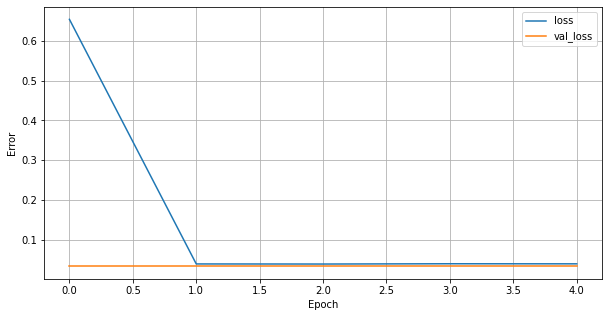

In [14]:

plt.rcParams['figure.figsize'] = [10, 5]
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)


plot_loss(history)


In [15]:
score = model.evaluate(test_ds, verbose=0)
print("Test loss:", score)
#print("Test accuracy:", score[1])


Test loss: 0.033414650708436966


tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 32, 32, 3), dtype=float32)
tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0

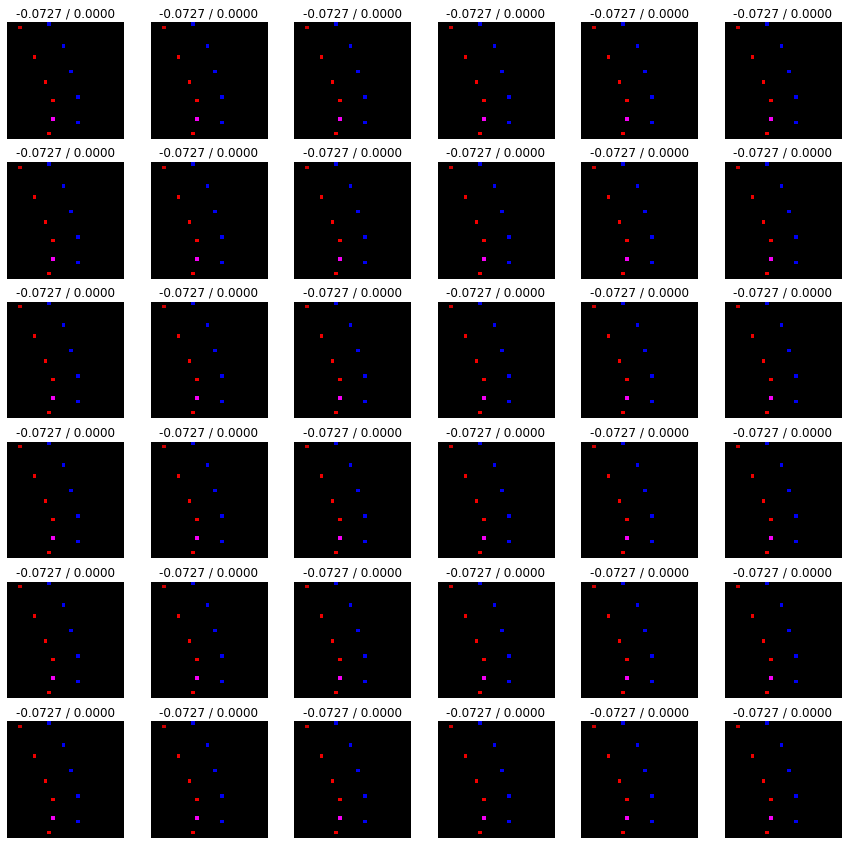

In [16]:
# plt.rcParams['figure.figsize'] = [15, 15]
# for i in range(49):
#     plt.subplot(7, 7, i+1)
#     plt.imshow(x_test[i].reshape(28, 28), cmap='gray', interpolation='none')
#     plt.axis('off')
#     plt.title("{}, is: {:.2f}".format(
#         y_test[i], model.predict(x_test[i:i+1])[0][0],2))

plt.rcParams['figure.figsize'] = [15, 15]
for i in range(36):
    for images, labels in test_ds.take(1):
        for x in range(1): 
            ax = plt.subplot(6, 6, i + 1)
            print(images)
            plt.imshow(images[x].numpy().astype("uint8"))
            plt.title(
                "{:.4f} / {:.4f}".format(labels[x].numpy()[3], model.predict(images)[0][0]))
            plt.axis("off")
